In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('data/budget_revisions_by_major_class.csv')

C:\Users\kinga\AppData\Local\Temp\ipykernel_76348\1554678075.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


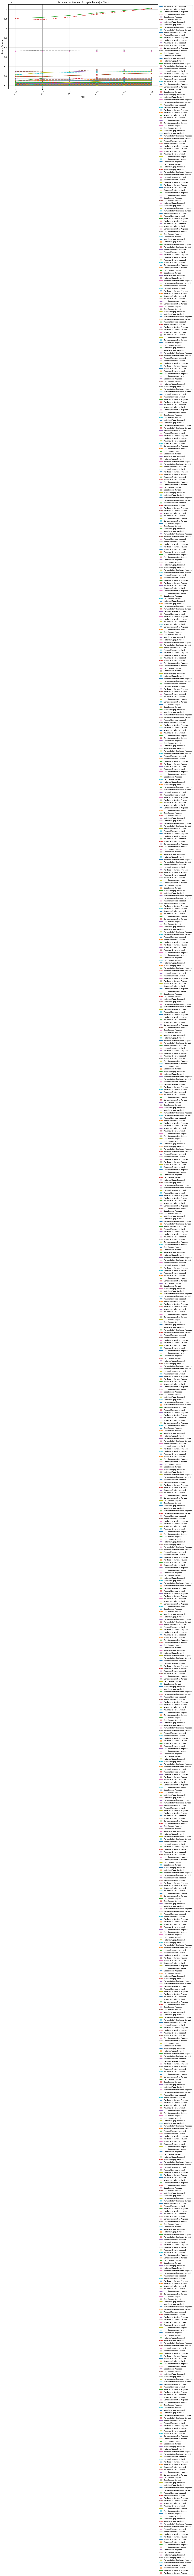

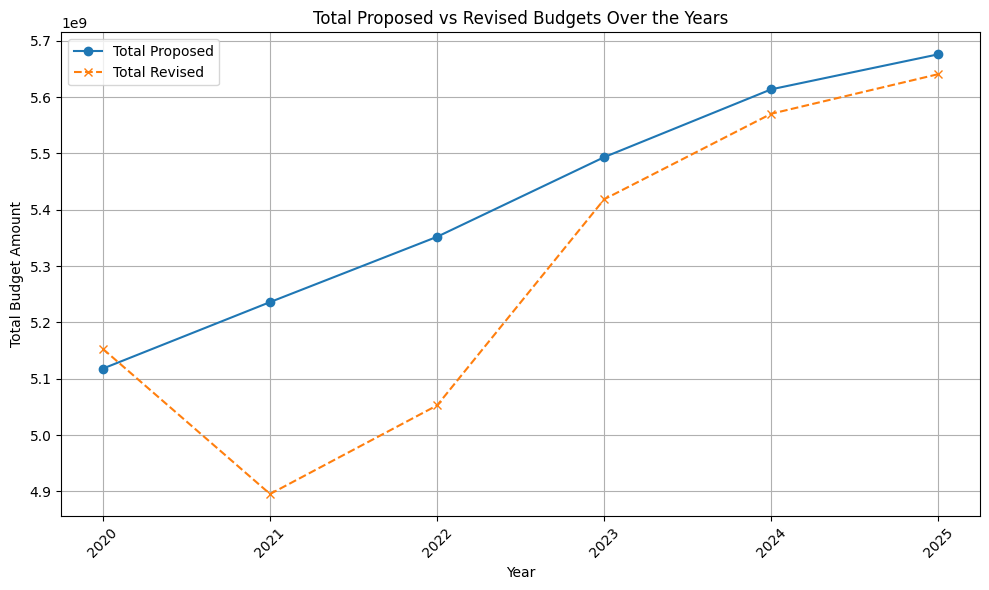

In [9]:
years = ['2020', '2021', '2022', '2023', '2024', '2025']
proposed_cols = [f'{year} (Proposed)' for year in years]
revised_cols = [f'{year} (Revised)' for year in years]

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Plot Proposed vs Revised Budgets
for index, row in data.iterrows():
    plt.plot(years, row[proposed_cols], label=f"{row['major_class_description']} Proposed", marker='o')
    plt.plot(years, row[revised_cols], label=f"{row['major_class_description']} Revised", linestyle='--', marker='x')

plt.title('Proposed vs Revised Budgets by Major Class')
plt.xlabel('Year')
plt.ylabel('Budget Amount')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid()
plt.tight_layout()

# Save the plot
plt.savefig('proposed_vs_revised_budgets.png')
plt.show()

# Calculate total budgets for proposed and revised
total_proposed = data[proposed_cols].sum()
total_revised = data[revised_cols].sum()

# Plot Total Budgets over the years
plt.figure(figsize=(10, 6))
plt.plot(years, total_proposed, label='Total Proposed', marker='o')
plt.plot(years, total_revised, label='Total Revised', linestyle='--', marker='x')

plt.title('Total Proposed vs Revised Budgets Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Budget Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Save the total budget plot
plt.savefig('total_budget_trends.png')
plt.show()

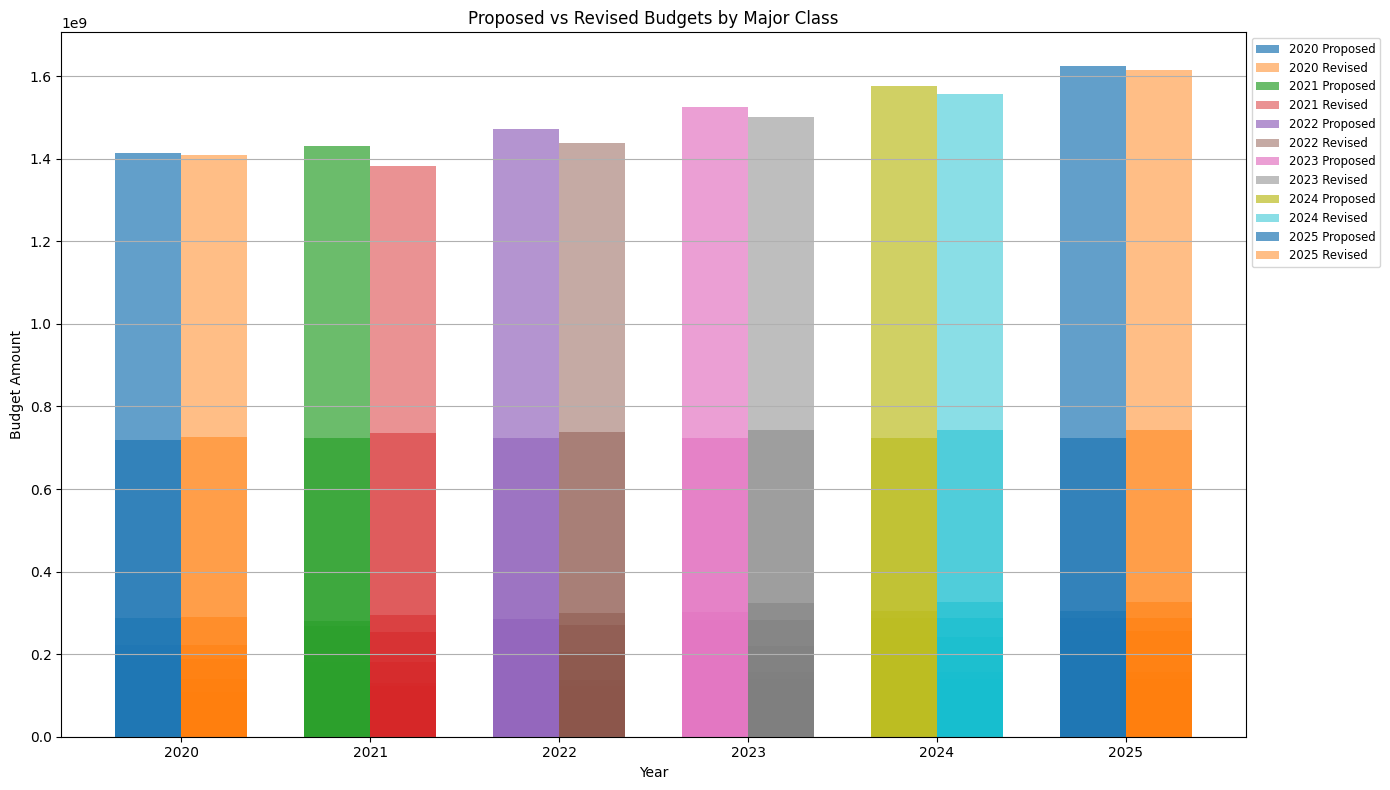

In [10]:
bar_width = 0.35
years_index = np.arange(len(years))

# Create figure for Proposed and Revised Budgets combined
plt.figure(figsize=(14, 8))

for i, year in enumerate(years):
    proposed_values = data[f'{year} (Proposed)']
    revised_values = data[f'{year} (Revised)']
    
    # Plot bars for each year
    plt.bar(years_index[i] - bar_width/2, proposed_values, bar_width, label=f'{year} Proposed', alpha=0.7)
    plt.bar(years_index[i] + bar_width/2, revised_values, bar_width, label=f'{year} Revised', alpha=0.5)

# Adding labels and title
plt.title('Proposed vs Revised Budgets by Major Class')
plt.xlabel('Year')
plt.ylabel('Budget Amount')
plt.xticks(years_index, years)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(axis='y')
plt.tight_layout()

# Save the combined bar chart
plt.savefig('combined_proposed_revised_budgets.png')
plt.show()